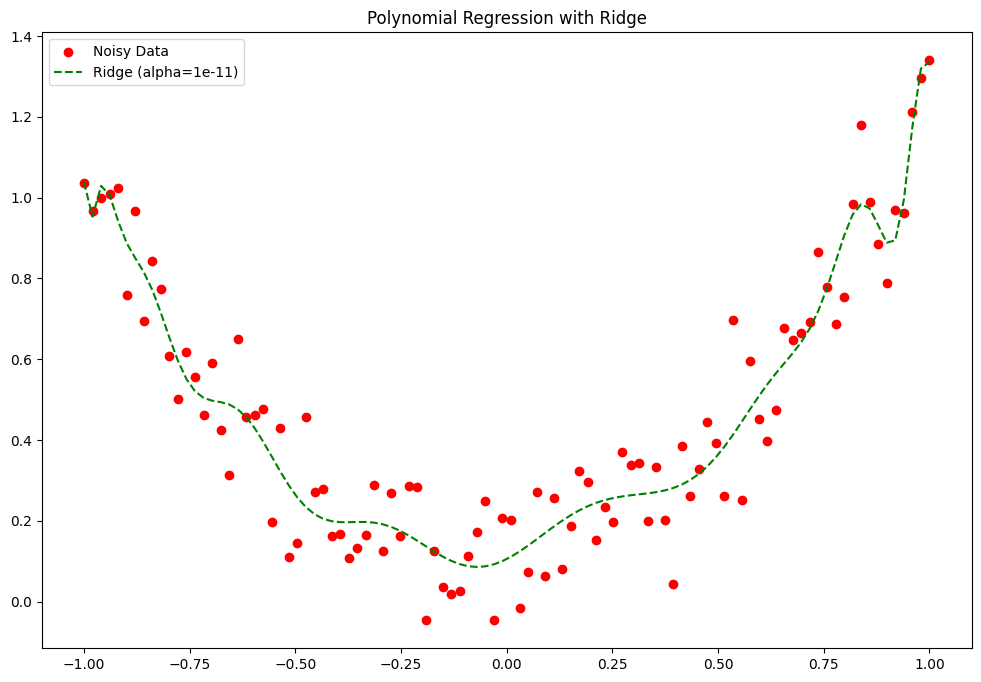

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

# Generate data
x = np.linspace(-1, 1, 100)
beta = [.1, .1, 1]
tnoisy = beta[0] + beta[1]*x + beta[2]*x**2 + np.random.normal(0, .1, len(x))

# Reshape x to be a 2D array
x = x.reshape(-1, 1)

# 1. Generate polynomial features with a higher degree
degree = 30  # Increased degree for more complex fitting
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(x)

# 2. Set alpha value for Ridge (Regularization strength)
alpha = 0.00000000001  # You can change this value

# Fit Ridge regression
ridge = Ridge(alpha=alpha, max_iter=10000)
ridge.fit(X_poly, tnoisy)

# Predict on the test set
xtest = np.linspace(-1, 1, 100).reshape(-1, 1)
X_polytest = poly_features.transform(xtest)
ridge_pred = ridge.predict(X_polytest)

# 3. Plot the results

plt.figure(figsize=(12, 8))

# Plot the original noisy data
plt.scatter(x, tnoisy, c='r', label='Noisy Data')

# Plot Ridge prediction
plt.plot(xtest, ridge_pred, label=f'Ridge (alpha={alpha})', color='g', linestyle='--')

plt.legend()
plt.title('Polynomial Regression with Ridge')
plt.show()
